In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [3]:
# results_folder = "sampling_louvain_results_knn"
# results_folder = "sampling_louvain_results_knn_no_weights"
results_folder = "/home/eidf128/eidf128/stirkova_big_eidf/ip/spark_exploration/sampling_louvain_results_knn"


In [4]:
def get_cluster_df(sample_size, i, replace = False):
    folder_path = f"{results_folder}/{sample_size}/{i}"
    df = pd.read_pickle(f"{folder_path}/sample_df.pkl")
    if "index" in df.columns:
        df = df.drop("index", axis=1)
    # in some experiments with small sample size, cluster 4 is split into 4 and 5
    # seems like dev_lang_dis is what is causing this
    if replace:
        df["cluster"] = df["cluster"].replace(5, 4)
    return df

def get_communinies(sample_size, i, ):
    folder_path = f"{results_folder}/{sample_size}/{i}"
    with open(f"{folder_path}/communities.pkl", 'rb') as file:
        communities = pickle.load(file)
    return communities


In [5]:
def get_graph(sample_size, i, ):
    folder_path = f"{results_folder}/{sample_size}/{i}"
    with open(f"{folder_path}/G.gpickle", 'rb') as file:
        G = pickle.load(file)
    return G

In [6]:
# G = get_graph(20000, 2)

In [7]:
# def get_mean_values(df):
#     mean_values_df = df.groupby("cluster").mean()
#     # if cluster 0 is the ASD cluster, swap the rows to make sure cluster 0 is non-ASD and cluster 1 is ASD => consistent between all experiment runs
#     if mean_values_df.iloc[0]['asd'] > mean_values_df.iloc[1]['asd']:
#         mean_values_df.iloc[[0, 1]] = mean_values_df.iloc[[1, 0]].values
#         # print("Cluster 0 and 1 swapped!")
#     return mean_values_df


def get_mean_values(df):
    mean_values_df = df.groupby("cluster").mean()
    # sort the clusters by the mean value of the 'asd' column
    mean_values_df = mean_values_df.sort_values(by='asd')
    mean_values_df = mean_values_df.sort_values(by='asd').reset_index(drop=True)
    
    return mean_values_df

In [8]:
def print_heatmap(means_df, save_path=None):
    #Plot Heatmap
    plt.figure(figsize=(8, 5))
    means_df.index = range(1, len(means_df) + 1)
    sns.heatmap(means_df, annot=False, cmap='viridis')
    plt.title('Mean value of variables by cluster')
    plt.ylabel('Cluster')
    plt.xlabel('Variable')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)


        asd  dev_lang  dev_lang_dis       sex  attn_behav  dev_speech  \
0  0.057576       0.0      0.000000  0.000000    0.000000    0.000000   
1  0.068264       0.0      0.000000  0.000000    0.000000    0.000000   
2  0.231871       0.0      0.000000  1.000000    0.000000    0.000000   
3  0.484603       0.0      0.000000  0.588331    1.000000    0.000000   
4  0.850440       1.0      0.728576  0.732160    0.430108    0.418703   

   dev_soc_prag  birth_oth_calc  dev_motor  behav_adhd  ...  mood_sep_anx  \
0      0.000000        0.010606   0.000000    0.000000  ...      0.031061   
1      0.000000        0.023508   0.000000    0.000000  ...      0.004521   
2      0.000000        0.050346   0.000000    0.000000  ...      0.007390   
3      0.000000        0.102917   0.000000    0.904376  ...      0.063209   
4      0.250896        0.166504   0.253829    0.348322  ...      0.059954   

   mood_dmd  mood_bipol  multiple_birth  mood_or_anx  \
0  0.003030    0.083333        0.002273   

,asd,dev_lang,dev_lang_dis,sex,attn_behav,behav_adhd,mood_dep,mood_anx,mood_or_anx
1,0.057576,0.0,0.000000,0.000000,0.000000,0.000000,0.646212,0.613636,1.000000
2,0.068264,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049729
3,0.231871,0.0,0.000000,1.000000,0.000000,0.000000,0.075751,0.088222,0.182448
4,0.484603,0.0,0.000000,0.588331,1.000000,0.904376,0.284441,0.390600,0.602107
5,0.850440,1.0,0.728576,0.732160,0.430108,0.348322,0.105572,0.217009,0.331052


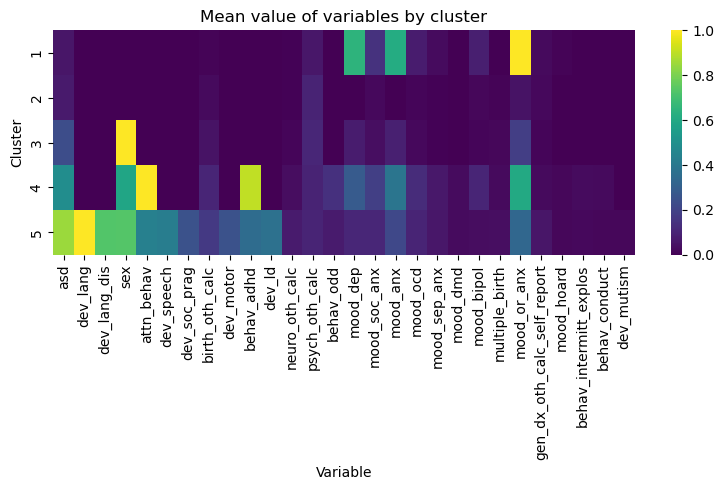

In [9]:
df = get_cluster_df(10000 , 0)
# mean_values_df = df.groupby("cluster").mean()
df = get_mean_values(df)
print(df)
# print_heatmap(df, "figures/louvain_heatmap_10k_knn_no_weights_idx1.pdf")
# print_heatmap(df, "figures/louvain_heatmap_10k_knn.pdf")
print_heatmap(df)
df['asd']
df[['asd', 'dev_lang', 'dev_lang_dis', 'sex', 'attn_behav', 'behav_adhd', 'mood_dep',
     'mood_anx', 'mood_or_anx']]

In [10]:
# Check if the number of clusters are consistent between different runs
sample_sizes = [1000,2000, 4000, 6000, 8000, 10000, 20000]
for n in sample_sizes:
    print()
    print(f"Sample size: {n}")
    lengths = []
    for i in range(5):
        communities = get_communinies(n, i)
        len_communities = len(communities)
        lengths.append(len_communities)
        # print(len_communities)
    print(lengths)
    if len(set(lengths)) > 1:
        print("!!! Number of clusters are not consistent between different runs")



Sample size: 1000
[5, 5, 6, 5, 5]
!!! Number of clusters are not consistent between different runs

Sample size: 2000
[5, 5, 6, 5, 5]
!!! Number of clusters are not consistent between different runs

Sample size: 4000
[5, 5, 5, 5, 5]

Sample size: 6000
[5, 5, 5, 5, 5]

Sample size: 8000
[5, 5, 5, 5, 5]

Sample size: 10000
[5, 5, 5, 5, 5]

Sample size: 20000
[5, 5, 5, 5, 5]


In [11]:
# df = get_cluster_df(10001 , 0)
# # mean_values_df = df.groupby("cluster").mean()
# df = get_mean_values(df)
# print_heatmap(df)
# df.iloc[[0, 1]] = df.iloc[[1, 0]].values
# df.iloc[0]['asd']

In [12]:
sample_sizes = [1000,2000, 4000, 6000, 8000, 10000, 20000]
n_samples = 5
all_means = []
for n in sample_sizes:
    sample_dfs_means = []
    for i in range(n_samples):
        if (n == 1000) and i == 0:
            continue
        df = get_cluster_df(n , i)
        means = get_mean_values(df)
        sample_dfs_means.append(means)
        # print_heatmap(means)
    all_means.append(sample_dfs_means)

In [13]:
print(len(all_means)) # number of sample sizes
print(len(all_means[1])) # number of runs for each sample size, should be 5

7
5


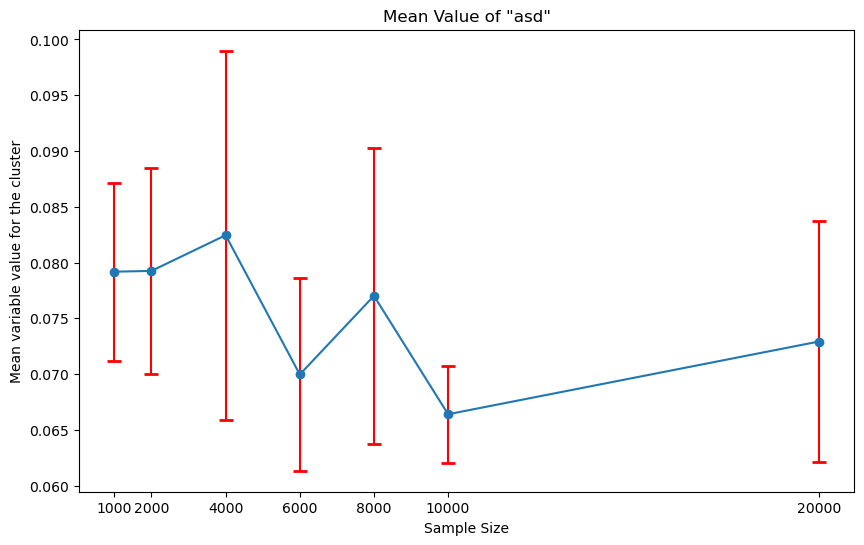

In [14]:
# Extract mean values for 'asd' column and row 1
mean_values = []
std_devs = []

for sample_dfs_means in all_means:
    asd_values = [df.loc[1, 'asd'] for df in sample_dfs_means]
    mean_values.append(np.mean(asd_values))
    std_devs.append(np.std(asd_values))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(sample_sizes, mean_values, yerr=std_devs, fmt='-o', capsize=5, capthick=2, ecolor='red')
plt.xlabel('Sample Size')
plt.ylabel('Mean variable value for the cluster')
plt.title('Mean Value of "asd"')
plt.xticks(sample_sizes)  # Show only the defined sample sizes on the x-axis
# plt.grid(True, axis='y')  # Remove gridlines on the x-axis
plt.show()

In [15]:
def plot_means_across_clusters(variables, rows=7, cols=4, figsize = (15, 22), save_path = None):
    n_clusters = 5
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=False)
    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Define colors for the clusters
    colors = ['red', 'blue', 'green', 'orange', 'purple']

    # Iterate over each variable
    for i, var in enumerate(variables):
        mean_values = [[] for _ in range(n_clusters)]
        std_devs = [[] for _ in range(n_clusters)]

        for sample_dfs_means in all_means:
            # print('New sample size')
            for cluster in range(n_clusters):
                # print('Cluster:', cluster)
                var_values = [df.loc[cluster, var] for df in sample_dfs_means]
                # print('Variable values:', var_values)
                mean_values[cluster].append(np.mean(var_values))
                std_devs[cluster].append(np.std(var_values))
                # print('Mean:', mean_values[cluster])
                # print('Std Dev:', std_devs[cluster])

        # Plotting
        for cluster in range(n_clusters):
            lower_bound = np.maximum(0, np.array(mean_values[cluster]) - np.array(std_devs[cluster]))
            upper_bound = np.minimum(1, np.array(mean_values[cluster]) + np.array(std_devs[cluster]))
            error = [mean_values[cluster] - lower_bound, upper_bound - mean_values[cluster]]
            axes[i].errorbar(sample_sizes, mean_values[cluster], yerr=error, fmt='-o', capsize=5, capthick=2, 
                             color=colors[cluster], markersize=10-1.75*cluster)
        
        axes[i].set_ylabel(f'mean value')
        axes[i].set_title(var)
        axes[i].set_xticks(sample_sizes)
        axes[i].set_xticklabels(['1K', '2K', '4K', '6K', '8K', '10K', '20K'])
        axes[i].grid(True, axis='y') 
        axes[i].set_ylim(-0.05, 1.05) 

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Set common labels
    fig.text(0.5, -0.02, 'Sample Size', ha='center')

    plt.tight_layout()
    plt.legend([f'Cluster {i+1}' for i in range(n_clusters)], loc='best')
    
    if save_path:
        plt.savefig(save_path)

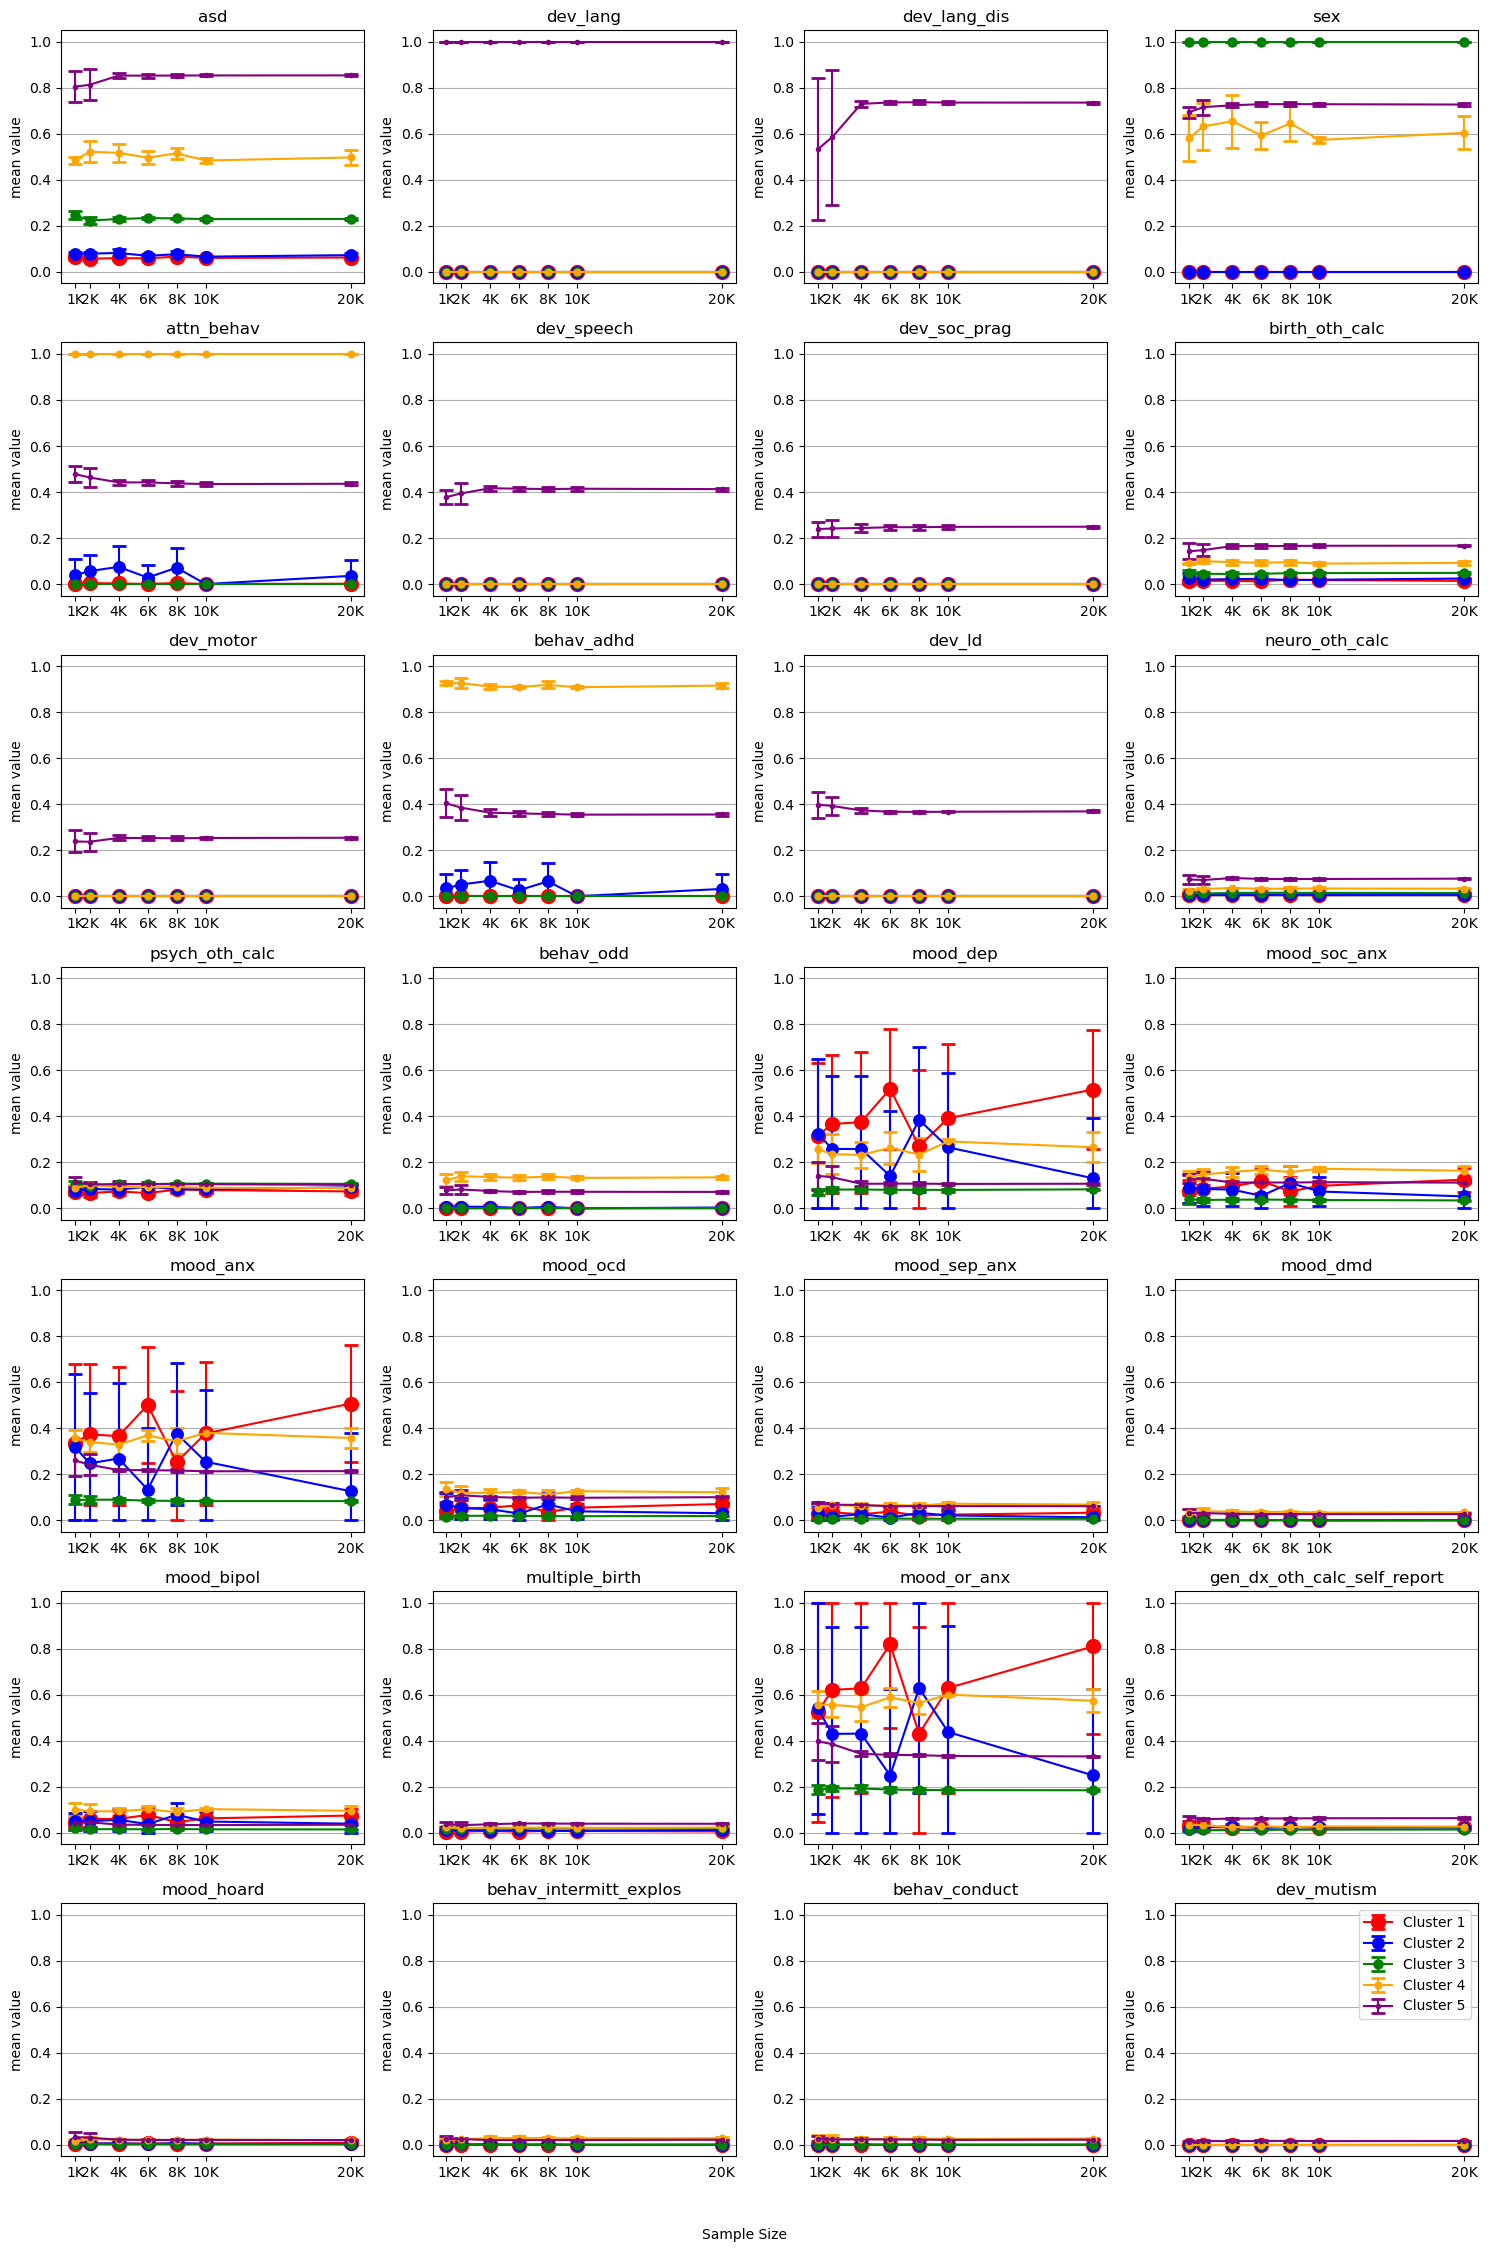

In [16]:
variables = all_means[0][0].columns.tolist()[:28]
plot_means_across_clusters(variables, save_path=None)
# plot_means_across_clusters(variables, save_path="figures/sampling_exp_non_weighted_all_vars.pdf")

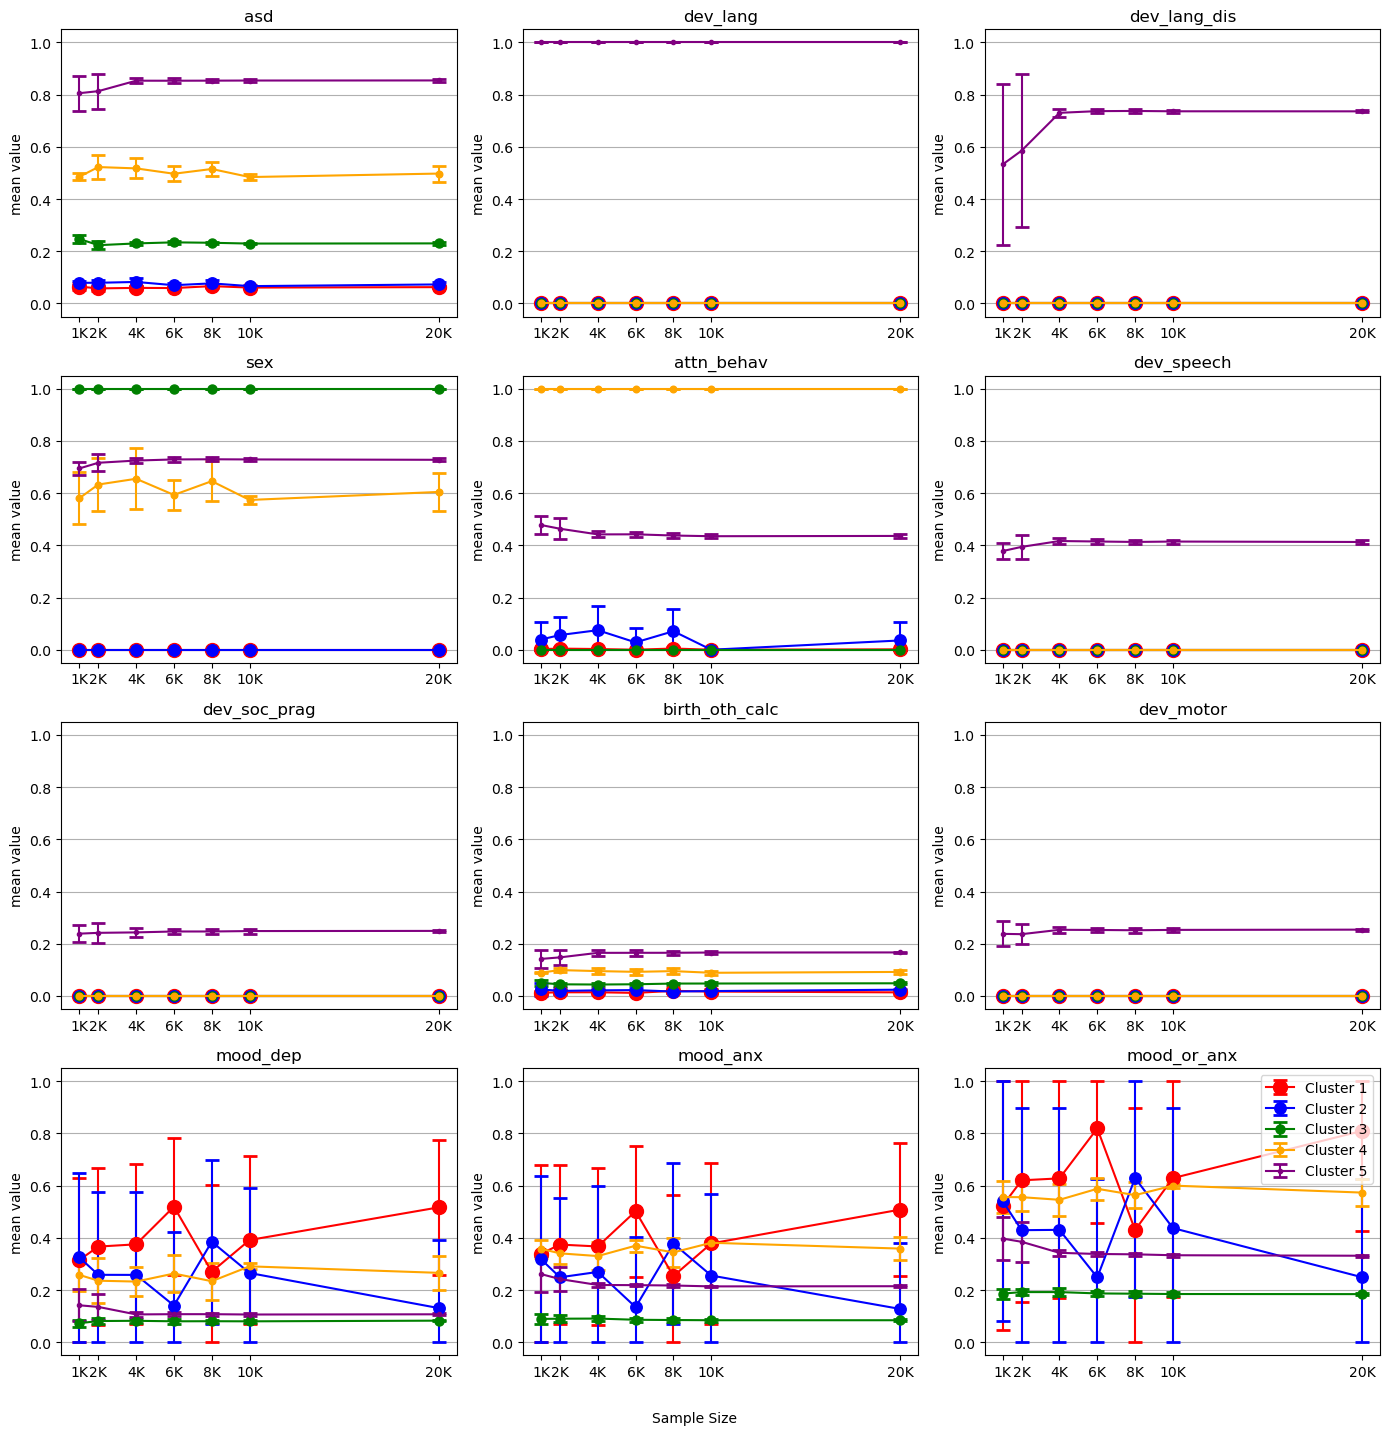

In [17]:
variables = all_means[0][0].columns.tolist()[:9]
mood_vars = ['mood_dep', 'mood_anx', 'mood_or_anx']
variables = variables + mood_vars
# variables = all_means[0][0].columns.tolist()[:12]
plot_means_across_clusters(variables, 4, 3, figsize=(14, 14))
# plot_means_across_clusters(variables,  4, 3, figsize=(14, 14), save_path="figures/sampling_exp_non_weighted_1+8+3_vars.pdf")


In [18]:
# List of variables to plot
# variables = all_means[0][0].columns.tolist()[:6]
# fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=False)

# mood_or_anx - goes above 1? 
# variables = ['mood_dep', 'mood_anx', 'mood_or_anx']
variables = ['mood_or_anx']



# plot_means_across_clusters(variables)

### Summary plot

In [19]:
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_mean_std_across_clusters(variables, rows= 3, cols=3, figsize=(15, 10), save_path=None):
#     n_clusters = 5
#     fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=False)
#     # Flatten the axes array for easy iteration
#     axes = axes.flatten()

#     # Define colors for the clusters
#     colors = ['red', 'blue', 'green', 'orange', 'purple']

#     # Iterate over each variable
#     for i, var in enumerate(variables):
#         mean_values = [[] for _ in range(n_clusters)]
#         std_devs = [[] for _ in range(n_clusters)]

#         for sample_dfs_means in all_means:
#             # print('New sample size')
#             for cluster in range(n_clusters):
#                 # print('Cluster:', cluster)
#                 var_values = [df.loc[cluster, var] for df in sample_dfs_means]
#                 # print('Variable values:', var_values)
#                 mean_values[cluster].append(np.mean(var_values))
#                 std_devs[cluster].append(np.std(var_values))
#                 # print('Mean:', mean_values[cluster])

#         mean_std_across_clusters = np.mean(std_devs, axis=0)
#         # print(mean_std_across_clusters)

        

#         # Plotting

#         axes[i].bar(range(len(sample_sizes)), mean_std_across_clusters)
        
#         # axes[i].set_ylabel(f'mean value')
#         axes[i].set_title(var)
#         axes[i].set_xticks(range(len(sample_sizes)))
#         axes[i].set_xticklabels(['1K', '2K', '4K', '6K', '8K', '10K', '20K'])
#         # axes[i].grid(True, axis='y') 
#         axes[i].set_ylim(0, 0.1) 


#     # Remove any unused subplots
#     for j in range(i + 1, len(axes)):
#         fig.delaxes(axes[j])

#     # Set common labels
#     fig.text(0.5, -0.02, 'Sample Size', ha='center')

#     plt.tight_layout()
#     # plt.legend([f'Cluster {i+1}' for i in range(n_clusters)], loc='best')
    
#     if save_path:
#         plt.savefig(save_path)

In [20]:
sample_sizes = [1000, 2000, 4000, 8000, 10000, 20000]
n_samples = 5
all_means = []
for n in sample_sizes:
    sample_dfs_means = []
    for i in range(n_samples):
        if (n == 1000) and i == 0:
            continue
        df = get_cluster_df(n , i)
        means = get_mean_values(df)
        sample_dfs_means.append(means)
        # print_heatmap(means)
    all_means.append(sample_dfs_means)

[0.02397506 0.02928745 0.01606997 0.0110166  0.00508742 0.01074713]
[0.0616245  0.05863275 0.00293152 0.00159752 0.00123194 0.00079132]
[0.02490069 0.027169   0.02499312 0.01687353 0.00395147 0.0153918 ]
[0.0214727  0.02284451 0.02141858 0.02043395 0.00173175 0.01627431]
[0.0060345  0.00909957 0.00218338 0.00146125 0.00154749 0.00129704]


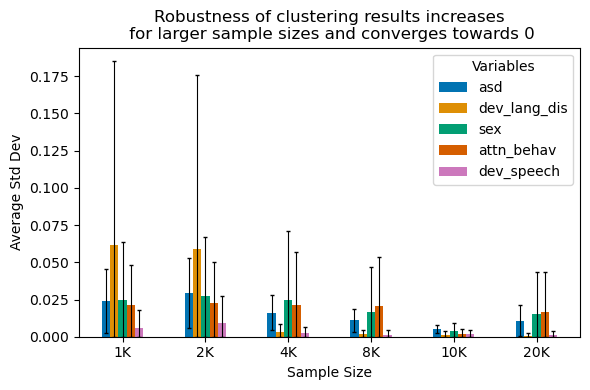

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_std_across_clusters(variables, figsize=(15, 10), save_path=None):
    n_clusters = 5
    n_variables = len(variables)
    fig, ax = plt.subplots(figsize=figsize)

    # Define colors for the variables
    # colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black']
    # colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black']
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    colors = sns.color_palette("colorblind")

    # Bar width and positions
    bar_width = 0.1
    indices = np.arange(len(sample_sizes))

    # Iterate over each variable
    for i, var in enumerate(variables):
        mean_values = [[] for _ in range(n_clusters)]
        std_devs = [[] for _ in range(n_clusters)]

        for sample_dfs_means in all_means:
            for cluster in range(n_clusters):
                var_values = [df.loc[cluster, var] for df in sample_dfs_means]
                mean_values[cluster].append(np.mean(var_values))
                std_devs[cluster].append(np.std(var_values))

        mean_std_across_clusters = np.mean(std_devs, axis=0)
        std_std_across_clusters = np.std(std_devs, axis=0)
        print(mean_std_across_clusters)


        # lower_bound = np.maximum(0, np.array(mean_values[cluster]) - np.array(std_devs[cluster]))
        # upper_bound = np.minimum(1, np.array(mean_values[cluster]) + np.array(std_devs[cluster]))
        # error = [mean_values[cluster] - lower_bound, upper_bound - mean_values[cluster]]

        lower_bound = np.maximum(0,  mean_std_across_clusters - std_std_across_clusters)
        upper_bound = np.minimum(1, mean_std_across_clusters + std_std_across_clusters)
        error = [mean_std_across_clusters - lower_bound, upper_bound - mean_std_across_clusters]
        # axes[i].errorbar(sample_sizes, mean_values[cluster], yerr=error, fmt='-o', capsize=5, capthick=2, 
                            # color=colors[cluster], markersize=10-1.75*cluster)
        
        ax.bar(indices + i * bar_width, mean_std_across_clusters, bar_width,yerr=error, color=colors[i % len(colors)], label=var, capsize=1.5,error_kw={'elinewidth': 0.8})
        

        # Plotting with offset
        # ax.bar(indices + i * bar_width, mean_std_across_clusters, bar_width, color=colors[i % len(colors)], label=var)

    # Set labels and title
    ax.set_ylabel('Average Std Dev')
    ax.set_xlabel('Sample Size')
    # ax.set_title('Average Standard Deviation of Variables Across Subsampled Clustering Runs')
    
    ax.set_title('Robustness of clustering results increases\n for larger sample sizes and converges towards 0')
    ax.set_xticks(indices + bar_width * (n_variables - 1) / 2)
    # ax.set_xticklabels(['1K', '2K', '4K', '6K', '8K', '10K', '20K'])
    ax.set_xticklabels(['1K','2K', '4K', '8K', '10K', '20K'])
    # ax.set_ylim(0, 0.18)
    ax.legend(loc='best', title='Variables')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)

variables = all_means[0][0].columns.tolist()[:6]
# variables = all_means[0][0].columns.tolist()[:3]
variables.remove('dev_lang') # remove dev_lang as it is 0 for all sample sizes
plot_mean_std_across_clusters(variables, figsize=(6, 4), save_path="/home/eidf128/eidf128/stirkova_big_eidf/ip/spark_exploration/figures/robustness_summary_plot2.pdf")
# plot_mean_std_across_clusters(variables, figsize=(6, 5))

In [69]:
sns.color_palette("colorblind", 10)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

mean [0.02397506 0.02928745 0.01606997 0.0110166  0.00508742 0.01074713]
std [0.02180251 0.02327839 0.01169282 0.0077885  0.00272862 0.01036518]

error [array([0.02180251, 0.02327839, 0.01169282, 0.0077885 , 0.00272862,
       0.01036518]), array([0.02180251, 0.02327839, 0.01169282, 0.0077885 , 0.00272862,
       0.01036518])]
mean [0. 0. 0. 0. 0. 0.]
std [0. 0. 0. 0. 0. 0.]

error [array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.])]
mean [0.0616245  0.05863275 0.00293152 0.00159752 0.00123194 0.00079132]
std [0.12324899 0.11726549 0.00586303 0.00319504 0.00246388 0.00158264]

error [array([0.0616245 , 0.05863275, 0.00293152, 0.00159752, 0.00123194,
       0.00079132]), array([0.12324899, 0.11726549, 0.00586303, 0.00319504, 0.00246388,
       0.00158264])]
mean [0.02490069 0.027169   0.02499312 0.01687353 0.00395147 0.0153918 ]
std [0.03881778 0.03985312 0.0457632  0.03019284 0.00542585 0.02797955]

error [array([0.02490069, 0.027169  , 0.02499312, 0.01687353, 0.00395147,

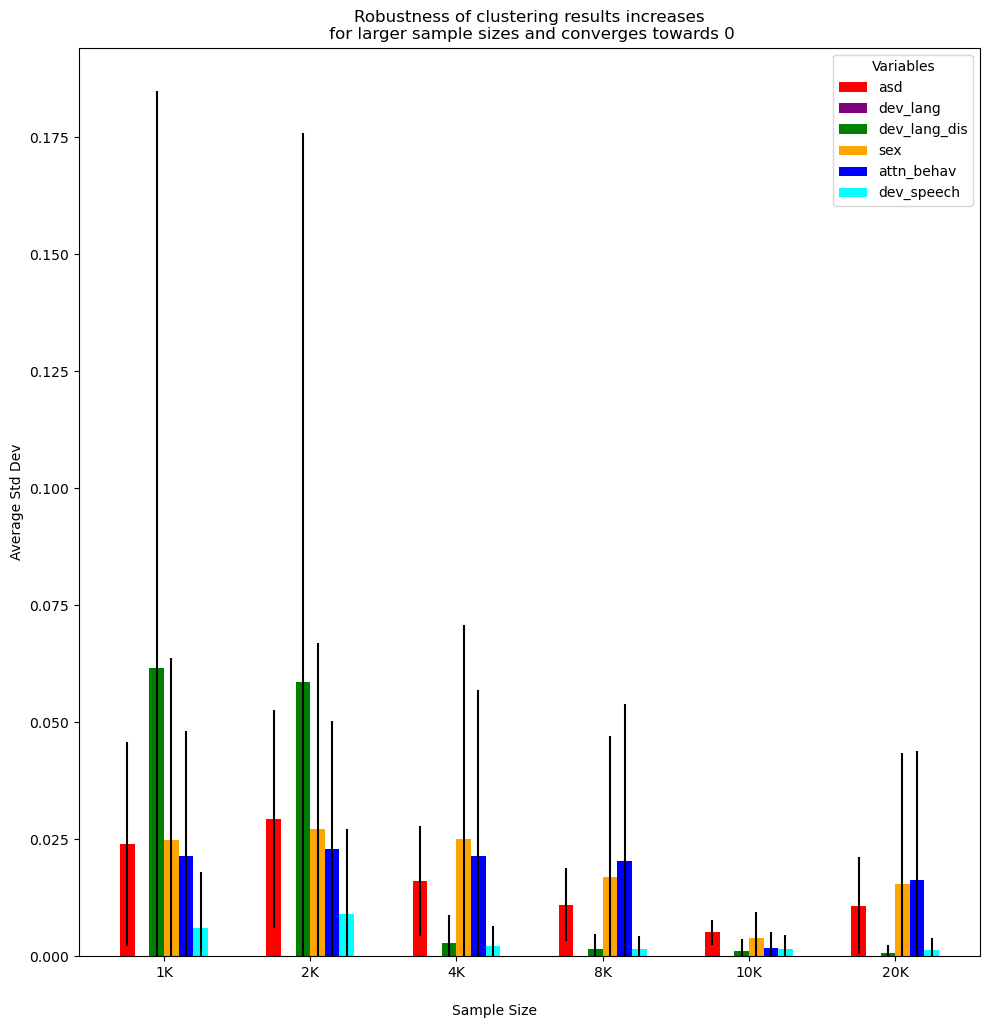

In [46]:
variables = all_means[0][0].columns.tolist()[:6]
# mood_vars = ['mood_dep', 'mood_anx', 'mood_or_anx']
# variables = variables + mood_vars
# variables = ['asd']
plot_mean_std_across_clusters(variables, figsize=(10, 10), save_path=None)

In [23]:
all_means[0][0].columns.tolist()

['asd',
 'dev_lang',
 'dev_lang_dis',
 'sex',
 'attn_behav',
 'dev_speech',
 'dev_soc_prag',
 'birth_oth_calc',
 'dev_motor',
 'behav_adhd',
 'dev_ld',
 'neuro_oth_calc',
 'psych_oth_calc',
 'behav_odd',
 'mood_dep',
 'mood_soc_anx',
 'mood_anx',
 'mood_ocd',
 'mood_sep_anx',
 'mood_dmd',
 'mood_bipol',
 'multiple_birth',
 'mood_or_anx',
 'gen_dx_oth_calc_self_report',
 'mood_hoard',
 'behav_intermitt_explos',
 'behav_conduct',
 'dev_mutism']

In [24]:
import numpy as np

# Example NumPy array
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Compute the mean across the columns
mean_across_columns = np.mean(array, axis=0)

print(mean_across_columns)

[4. 5. 6.]
